# Exercise 7

In [4]:
# Imports
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import networkx as nx

In [5]:
# Training data
c = [0,0,1,0,1,1,1,0,1]
x=[[20,20,20,20,40,40,40,20,60],[0,0,1,1,0,1,1,0,1],[10,70,20,80,40,60,50,60,60]]

### Useful functions

In [10]:
def h(x): #Entropy
    p = [x.count(i)/len(x) for i in np.unique(x)]
    s = 0
    for k in p:
        if k!=0:
            s -= k*np.log2(k)
    return s

def Iratiot(c,x,t): #Information ratio between c and x with x divided in two subsets with threshold value t
    hx = h(x)
    x = np.array(x)
    hc = h(c)
    h1 = h([c[i] for i in np.where(x<=t)[0]])
    h2 = h([c[i] for i in np.where(x>t)[0]])
    hcx = (len(x[x<=t])*h1+len(x[x>t])*h2)/len(x)
    i = hc-hcx
    print('H(c)=',hc)
    print('H(c|0)=',h1)
    print('H(c|1)=',h2)
    print('H(c|x)=',hcx)
    print('I(c,x)=',i)
    print('H(x)=',hx)
    print(' ')
    return i/hx


def split(c,x): #Creates a decision tree that uses IGR as a splitting criterion

    vals = np.unique(c)
    if len(vals)==1: #If all classes in training set are the same we can't learn anything and we just return a leaf
        return [(-1,vals[0])]
    
    else: # Find the best threshold and the best variable to perform a split then compute the decision tree on the left part and the right part that we created
        x0 = x[0] #First variable
        u0 = np.unique(x0) #All possible values of first variable
        t0 = [int((u0[i+1]+u0[i])/2) for i in range(len(u0)-1)] #All possible threshold of first variable

        x1 = x[1]
        u1 = np.unique(x1)
        t1 = [(u1[i+1]+u1[i])/2 for i in range(len(u1)-1)]

        x2 = x[2]
        u2 = np.unique(x2)
        t2 = [int((u2[i+1]+u2[i])/2) for i in range(len(u2)-1)]

        t = [t0,t1,t2]
        
        rat = [[Iratiot(c,x[i],j) for j in t[i]] if len(t[i])!=0 else [0] for i in range(3)] # IGR for all thresholds for all variables

        maxratind = [np.argmax(rat[i]) for i in range(3)] #Highest IGR for each variable
        Irat = [rat[i][maxratind[i]] for i in range(3)] #Highest IRG overall
        n = np.argmax(Irat)
        print('Best Information gain ratio:',Irat[n])
        tn = t[n][maxratind[n]] #Splitting threshold

        first = np.array(x[n])
        right = np.where(first<=tn)[0]
        left = np.where(first>tn)[0]

        cr = [c[j] for j in right]
        cl = [c[j] for j in left]


        xr = [[x0[i] for i in right],[x1[i] for i in right],[x2[i] for i in right]] #Values of training set in the right sub-tree
        xl = [[x0[i] for i in left],[x1[i] for i in left],[x2[i] for i in left]] #Values of training set in the left sub-tree

        return [(n,tn),split(cr,xr),split(cl,xl)]

In [11]:
tree = split(c,x)
print(tree)

H(c)= 0.9910760598382222
H(c|0)= 0.7219280948873623
H(c|1)= 0.0
H(c|x)= 0.40107116382631236
I(c,x)= 0.5900048960119099
H(x)= 1.3516441151533922
 
H(c)= 0.9910760598382222
H(c|0)= 1.0
H(c|1)= 0.0
H(c|x)= 0.8888888888888888
I(c,x)= 0.10218717094933338
H(x)= 1.3516441151533922
 
H(c)= 0.9910760598382222
H(c|0)= 0.8112781244591328
H(c|1)= 0.7219280948873623
H(c|x)= 0.7616392191414825
I(c,x)= 0.22943684069673975
H(x)= 0.9910760598382222
 
H(c)= 0.9910760598382222
H(c|0)= 0.0
H(c|1)= 0.954434002924965
H(c|x)= 0.8483857803777467
I(c,x)= 0.14269027946047552
H(x)= 2.6416041678685933
 
H(c)= 0.9910760598382222
H(c|0)= 1.0
H(c|1)= 0.9852281360342515
H(c|x)= 0.9885107724710847
I(c,x)= 0.0025652873671375698
H(x)= 2.6416041678685933
 
H(c)= 0.9910760598382222
H(c|0)= 0.9182958340544896
H(c|1)= 1.0
H(c|x)= 0.9727652780181631
I(c,x)= 0.018310781820059074
H(x)= 2.6416041678685933
 
H(c)= 0.9910760598382222
H(c|0)= 0.8112781244591328
H(c|1)= 0.9709505944546686
H(c|x)= 0.8999850522344305
I(c,x)= 0.091091

Each tuple contains the index of the variable used to perform the split and the threshold value (if the first value is -1 then the node is a leaf and the second value is the class in which you should put your sample)

In [5]:
vertices={}
links =[]

#Returns a dictionnary wich pairs an integer used to build the decision tree with the test you must perform on this node or the class you are assigned to
#and a list of edges with label yes or no depending on whether you passed the test this edge comes from or not
def get_verticesdict_and_edges(tree,father=-1,elabel='yes'):
    inds = list(vertices.keys())
    #Get first available index
    if len(inds)==0:
        ind = 0
    else:
        ind = np.max(inds)+1
    
    #Don't add an edge coming to the root
    if father >= 0:
        links.append((father,ind,elabel))
    #If you are on a leaf, which is represented by a list of length 1 here
    if len(tree)==1:
        vertices[ind] = 'Class = '+str(tree[0][1])
    else:
        root = tree[0]
        label = 'X'+str(root[0])+'<='+str(root[1])+'?'
        vertices[ind] = label
        get_verticesdict_and_edges(tree[1],ind,'yes')
        get_verticesdict_and_edges(tree[2],ind,'no')
    v = vertices.copy()
    e = links.copy()
    return v,e


v,e = get_verticesdict_and_edges(tree)
print(v,e)


{0: 'X0<=30?', 1: 'X1<=0.5?', 2: 'Class = 0', 3: 'X2<=50?', 4: 'Class = 1', 5: 'Class = 0', 6: 'Class = 1'} [(0, 1, 'yes'), (1, 2, 'yes'), (1, 3, 'no'), (3, 4, 'yes'), (3, 5, 'no'), (0, 6, 'no')]


### Plotting the tree

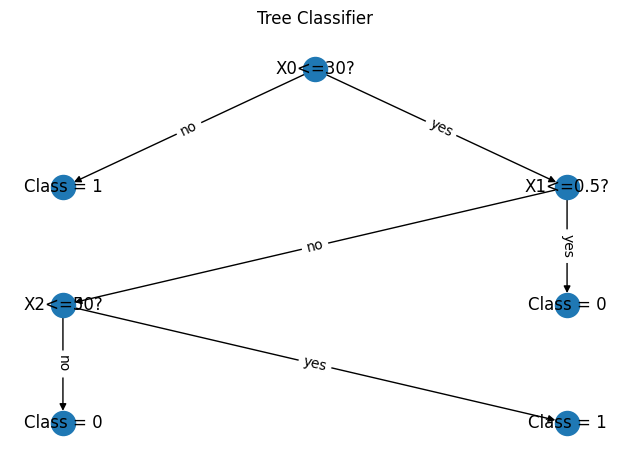

In [6]:
DG = nx.DiGraph()

#DG.add_nodes_from([v[i] for i in range(7)])
for link in e:
    DG.add_edge(link[0],link[1])

for layer, nodes in enumerate(reversed(tuple(nx.topological_generations(DG)))):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        DG.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(DG, subset_key="layer", align='horizontal')
elabel = {(a,b):c for a,b,c in e}

fig, ax = plt.subplots()
nx.draw(DG, pos=pos, ax=ax,labels=v)
nx.draw_networkx_edge_labels(DG,pos,edge_labels=elabel)
ax.set_title("Tree Classifier")
fig.tight_layout()
plt.show()


### COmputing accuracy on train set and plotting the confusion matrix

0 -th element of the train set:
True class: 0
Predicted class: 0
 
1 -th element of the train set:
True class: 0
Predicted class: 0
 
2 -th element of the train set:
True class: 1
Predicted class: 1
 
3 -th element of the train set:
True class: 0
Predicted class: 0
 
4 -th element of the train set:
True class: 1
Predicted class: 1
 
5 -th element of the train set:
True class: 1
Predicted class: 1
 
6 -th element of the train set:
True class: 1
Predicted class: 1
 
7 -th element of the train set:
True class: 0
Predicted class: 0
 
8 -th element of the train set:
True class: 1
Predicted class: 1
 


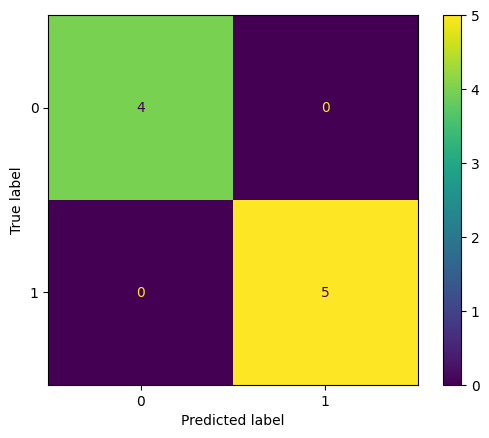

In [7]:
def predict(x,tree):
    if len(tree)==1:
        return tree[0][1]
    else:
        var,thresh = tree[0]
        if x[var] <= thresh:
            return predict(x,tree[1])
        else:
            return predict(x,tree[2])

tset = np.array(x)
preds = [predict(tset[:,i],tree) for i in range(len(c))]
for i in range(len(c)):
    print(i,'-th element of the train set:')
    print('True class:',c[i])
    print('Predicted class:',preds[i])
    print(' ')



ConfusionMatrixDisplay(confusion_matrix(c,preds)).plot()

### Testing with new samples

In [8]:
test = np.array([[32,1,10],[33,0,37],[62,0,50],[25,0,42]])
for k in test:
    print('Predicted class of',k,':',predict(k,tree))
    print(' ')

Predicted class of [32  1 10] : 1
 
Predicted class of [33  0 37] : 1
 
Predicted class of [62  0 50] : 1
 
Predicted class of [25  0 42] : 0
 


## Test cell:

In [9]:
v1 = input('Please enter a number between 0 and 80:')
v2 = input('Please enter a second number between 0 and 1:')
v3 = input('Please enter a third number between 0 and 90:')
vector = [int(v1),float(v2),int(v3)]
print('Predicted class of ',vector,':',predict(vector,tree))

Predicted class of  [25, 1.0, 21] : 1
